## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_mouse_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
#mouse_metadata.count()
#study_results.count()
overall_mouse_data_df.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
#overall_mouse_data_df.dtypes

In [3]:
# Checking the number of mice.
mouse_count_df = overall_mouse_data_df.count()
#mouse_count_df

In [4]:
#Todo:  Find the duplicate mouse id

In [5]:
# Dropped the duplicate mouse data.
mouse_data_nodupes_df= overall_mouse_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data_nodupes_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [6]:
#Find the unique drug types
#TODOs - how to I put these together. Create multiple series to put together.  

#mouse_data_nodupes_df.groupby('Drug Regimen', as_index = True)["Tumor Volume (mm3)"].describe()
var_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
med_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
men_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
sem_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#stats_df
#var_stat
#med_stat
#std_stat
#men_stat
#sem_stat

drug_stat_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#drug_stat_df

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_stat_v2_df = mouse_data_nodupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_stat_v2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

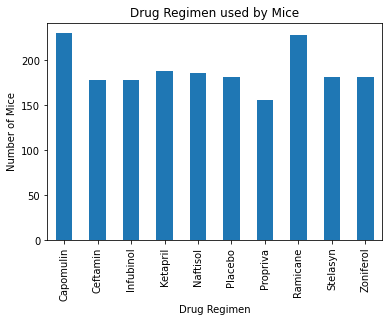

In [8]:
# Bar Chart - Count of Mice Using Drug Regimen - with Panads Dataframe
users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()

#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
users_df.plot(kind="bar")
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

In [24]:
# Bar Chart - Count of Mice Using Drug Regimen - with Matplotlib 
#users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
drug_regemin = mouse_data_nodupes_df["Drug Regimen"]
number_of_mice = mouse_data_nodupes_df["Mouse ID"].count()

x_axis = np.arange(len('drug_regemin'))
x_axis


#Todo:  Passing in the drugs and counts as lists.  


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Number of Mice')

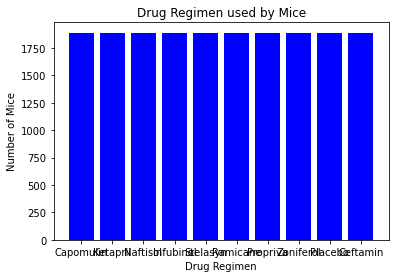

In [42]:
plt.bar(x_axis, number_of_mice, color='b', alpha = 1, align = 'center')

plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [34]:
#plt.xticks(x_axis, drug_regemin)

#plt.bar(x_axis, drug_regemin)


In [36]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
gender_of_mice = mouse_data_nodupes_df["Sex"].value_counts()
gender_of_mice_df = pd.DataFrame(gender_of_mice)
gender_of_mice_df['Gender_pct'] = (gender_of_mice_df.Sex / (gender_of_mice_df.Sex.sum()/100)).round(decimals=2)
renamed_genders_of_mice_df = gender_of_mice_df.rename(columns={"Sex":"Total Count", "Gender_pct":"Percentage of Mice"})
def format(x):
    return "{:.2f}%".format(x)
renamed_genders_of_mice_df['Percentage of Mice'] = renamed_genders_of_mice_df['Percentage of Mice'].apply(format)
renamed_genders_of_mice_df


,Total Count,Percentage of Mice
Male,958,50.74%
Female,930,49.26%


In [38]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
#renamed_genders_of_mice_df.plot(kind="pie")
#plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'method'

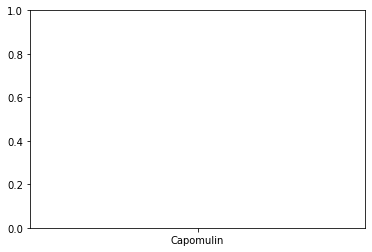

In [41]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
users = mouse_data_nodupes_df['Mouse ID'].count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))
x_axis =  mouse_data_nodupes_df['Drug Regimen']

plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

#users = mouse_data_nodupes_df.("Mouse ID").count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

ValueError: could not convert string to float: 'Female'

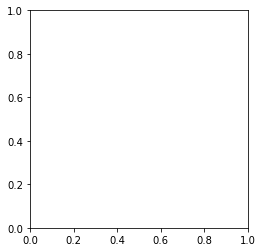

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#sex = mouse_data_nodupes_df.groupby(["Sex"])
sex = mouse_data_nodupes_df.groupby(["Sex"])

# The values of each section of the pie chart
sizes = mouse_data_nodupes_df["Sex"].count

# The colors of each section of the pie chart
colors = ["red", "blue"]
explode = (0.1, 0)  
plt.pie(sex, labels=sizes, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Treatment Impact by Sex")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
